In [3]:
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

#EDA

In [1]:
#!kaggle datasets download -d mohammadtalib786/retail-sales-dataset

In [ ]:
#Extract content from downloaded zip
zip_name = 'retail-sales-dataset.zip'
with zipfile.ZipFile(zip_name, 'r') as file:
    file.extractall()

In [4]:
#Define dataframe with extracted csv file
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
df.shape

(1000, 9)

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#Data cleansing

In [8]:
#Delete blankspaces before/after column names
df.columns = df.columns.str.strip()
#Change column names to lowercase and separated with _
new_cols = {col: col.lower().replace(' ', '_') for col in df.columns}
df.rename(columns=new_cols, inplace=True)
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [10]:
#Check null data
df.isnull().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [12]:
#Delete duplicates
df = df.drop_duplicates()

In [14]:
#Change dtype of date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

#Descriptive statistics

In [15]:
df.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [16]:
#Calculate average sales by product category
cat_avg_sales = df.groupby('product_category')['total_amount'].mean()
print(cat_avg_sales)

product_category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: total_amount, dtype: float64


In [17]:
#Now total sales
cat_tot_sales = df.groupby('product_category')['total_amount'].sum().reset_index()
print(cat_tot_sales)

  product_category  total_amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


In [20]:
#Monthly total sales
df['year_month'] = df['date'].dt.to_period('M')

cat_sales_ym = df.groupby(['product_category', 'year_month'])['total_amount'].sum().reset_index()

print(cat_sales_ym)

   product_category year_month  total_amount
0            Beauty    2023-01         12430
1            Beauty    2023-02         14035
2            Beauty    2023-03         10545
3            Beauty    2023-04         11905
4            Beauty    2023-05         12450
5            Beauty    2023-06         10995
6            Beauty    2023-07         16090
7            Beauty    2023-08          9790
8            Beauty    2023-09          6320
9            Beauty    2023-10         15355
10           Beauty    2023-11          9700
11           Beauty    2023-12         12400
12           Beauty    2024-01          1500
13         Clothing    2023-01         13125
14         Clothing    2023-02         14560
15         Clothing    2023-03         15065
16         Clothing    2023-04         13940
17         Clothing    2023-05         17455
18         Clothing    2023-06         10170
19         Clothing    2023-07          8250
20         Clothing    2023-08         12455
21        

#Data visualization

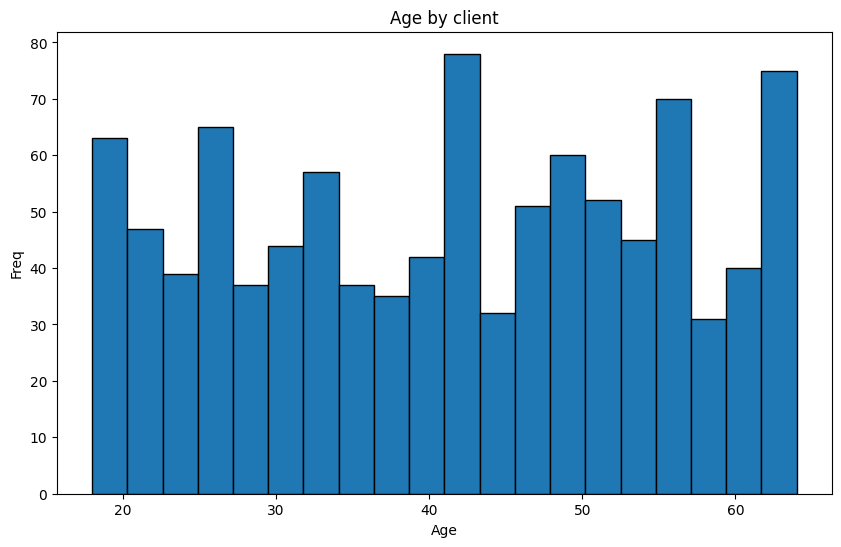

In [21]:
#Checking age distribution
plt.figure(figsize=(10,6))

#Setting up the variable being studied, qty. of bars and color of bar edges
plt.hist(df['age'], bins=20, edgecolor='black')

#Establishing the plot title
plt.title('Age by client')

#Now the label for the x axe
plt.xlabel('Age')

#And the y axe
plt.ylabel('Freq')

#Draw the plot on the output
plt.show()

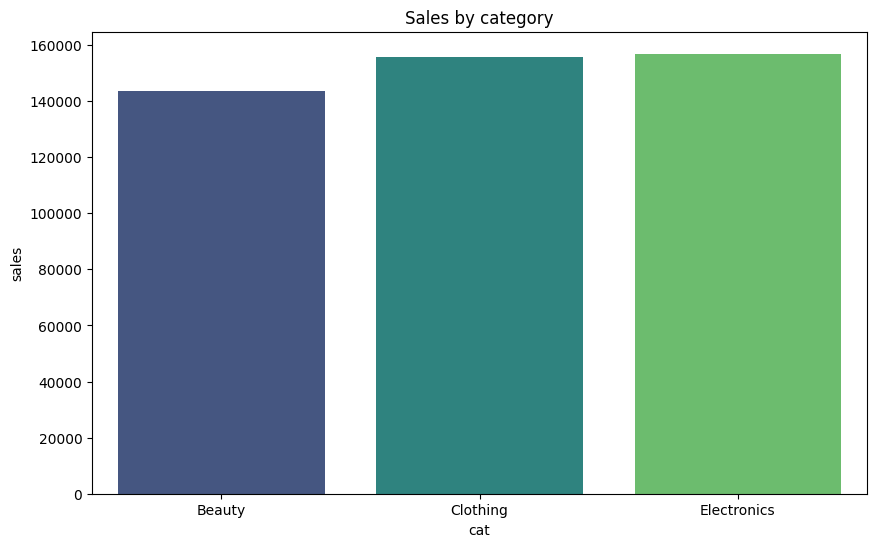

In [25]:
#Checking total sales by product category
plt.figure(figsize=(10,6))

#Setting up a bar plot with axes variables, sum estimator and styles
sns.barplot(x='product_category', y='total_amount', data=df, errorbar=None, palette='viridis', hue='product_category', dodge=None, estimator=sum)

plt.title('Sales by category')
plt.xlabel('cat')
plt.ylabel('sales')
plt.show()


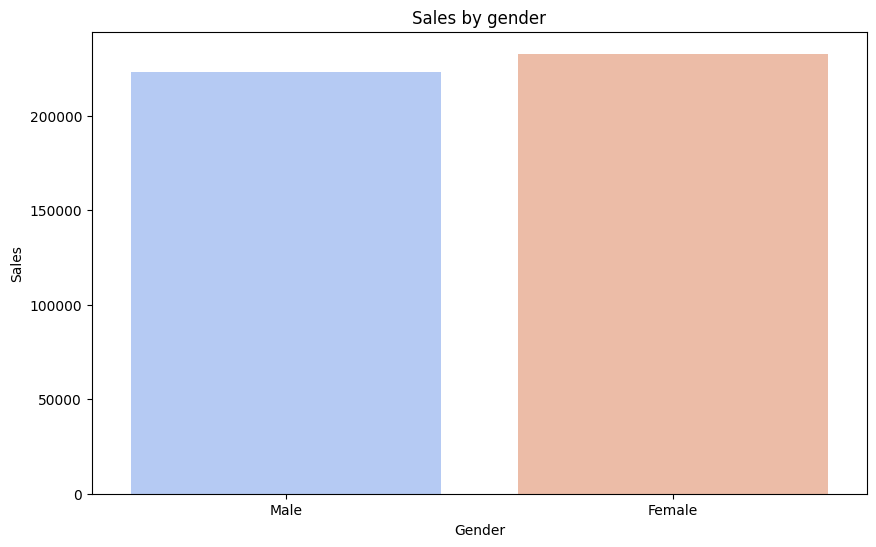

In [26]:
#Now by gender
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='total_amount', data=df, errorbar=None, palette='coolwarm', hue='gender', dodge=None, estimator=sum)

plt.title('Sales by gender')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()

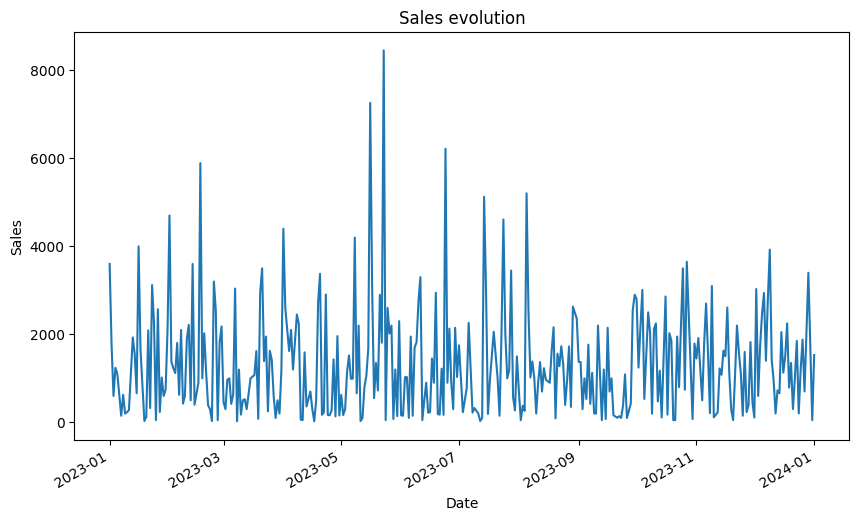

In [27]:
#Checking total sales timeline
plt.figure(figsize=(10,6))

#Plotting total sales respect to date
df.groupby('date')['total_amount'].sum().plot()

plt.title('Sales evolution')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

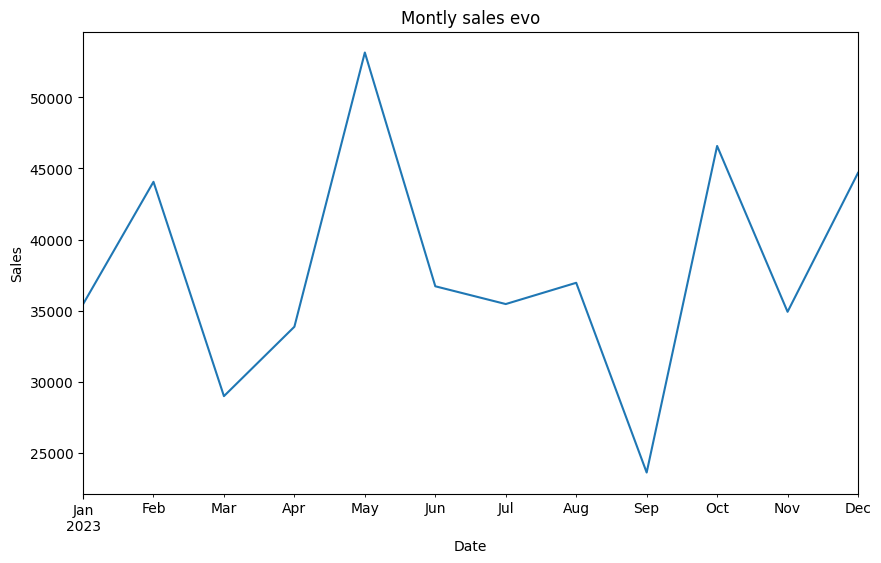

In [29]:
#Now monthly timeline
plt.figure(figsize=(10,6))

#Resampling dates by year_month, excluding 2024
df[df['date'].dt.year < 2024].resample('M', on='date')['total_amount'].sum().plot()

plt.title('Monthly sales evo')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

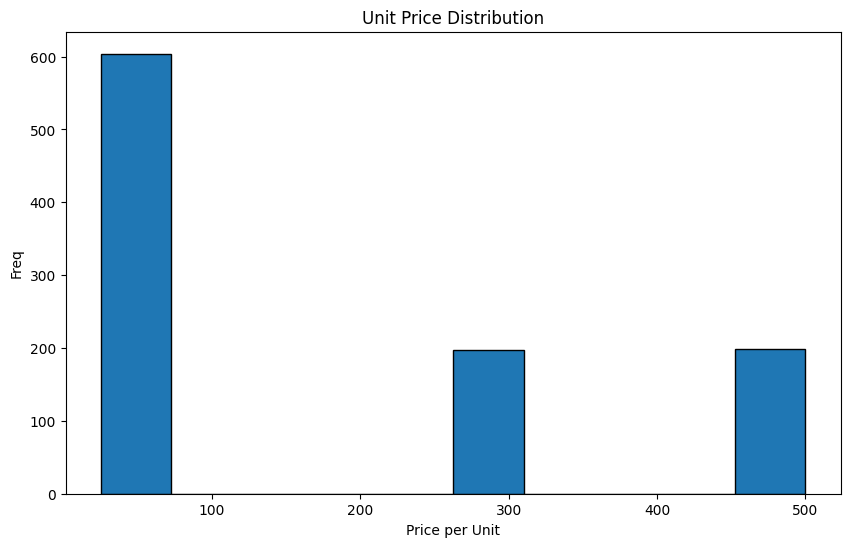

In [30]:
#Checking price by unit distribution
plt.figure(figsize=(10,6))
plt.hist(df['price_per_unit'], bins=10, edgecolor='black')

plt.title('Unit Price Distribution')
plt.xlabel('Price per Unit')
plt.ylabel('Freq')
plt.show()


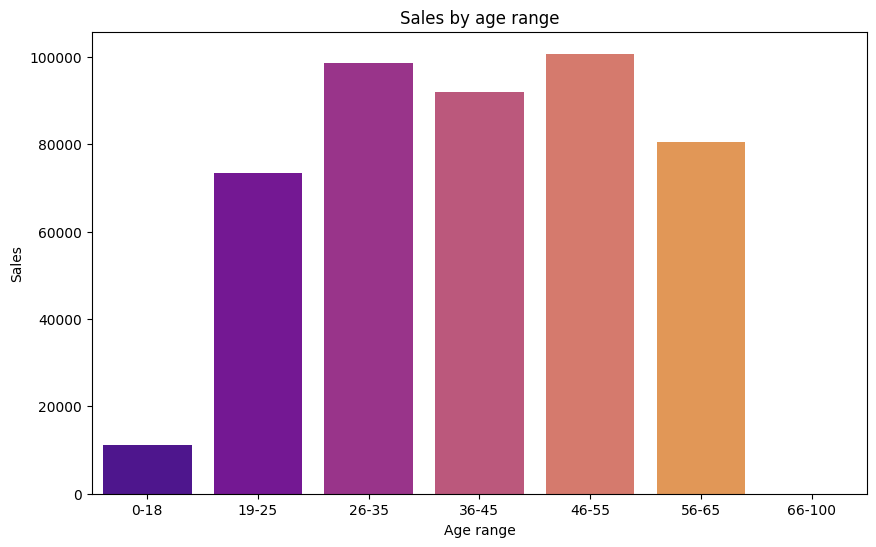

In [33]:
#Checking consumption by age range
bins = [0,18,25,35,45,55,65,100]
labels = ['0-18','19-25','26-35','36-45','46-55','56-65','66-100']

#Create the age_range variable with the previously established bins/labels
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.barplot(x='age_range', y='total_amount', data=df, errorbar=None, palette='plasma', hue='age_range', dodge=None, estimator=sum)

plt.title('Sales by age range')
plt.xlabel('Age range')
plt.ylabel('Sales')
plt.show()

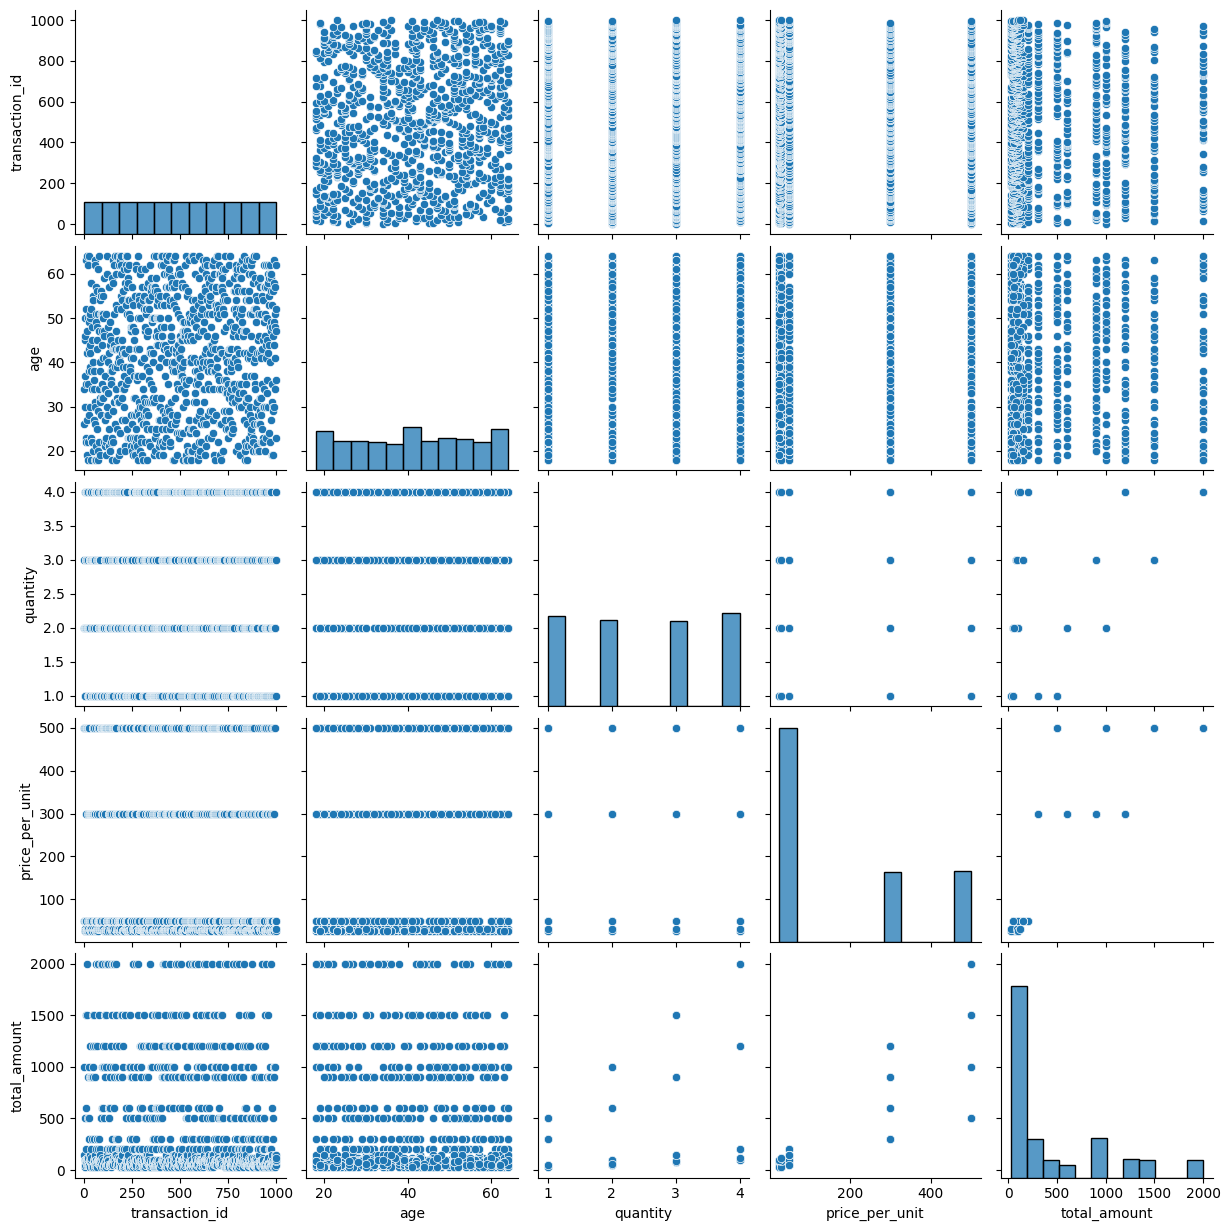

In [34]:
#Checking relations between variables, pair per pair
sns.pairplot(df)

In [35]:
#Calculating correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                transaction_id       age  quantity  price_per_unit  \
transaction_id        1.000000  0.065191 -0.026623       -0.060837   
age                   0.065191  1.000000 -0.023737       -0.038423   
quantity             -0.026623 -0.023737  1.000000        0.017501   
price_per_unit       -0.060837 -0.038423  0.017501        1.000000   
total_amount         -0.075034 -0.060568  0.373707        0.851925   

                total_amount  
transaction_id     -0.075034  
age                -0.060568  
quantity            0.373707  
price_per_unit      0.851925  
total_amount        1.000000  


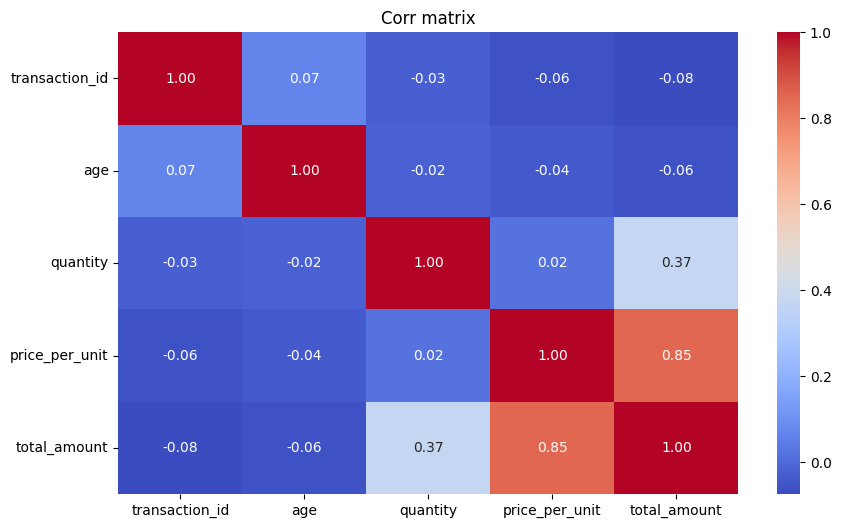

In [36]:
#Now plotting the matrix
plt.figure(figsize=(10,6))

#Setting up a heatmap with annotations and two decimals format
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Corr matrix')
plt.show()

In [ ]:
#Checking the existent relation between price per unit and total sales
plt.figure(figsize=(10,6))

#Setting up the scatterplot with variable axes
sns.scatterplot(x='price_per_unit', y='total_amount', data=df)

plt.title('Sales vs Price per Unit Scatterplot')
plt.xlabel('Price per Unit')
plt.ylabel('Sales')
plt.show()

#Quarterly Forecasting with FB Propet

In [37]:
#Extracting the last day registered in the data frame for the forecast
last_records = df[df['date'].dt.year==2024]
print(last_records)

     transaction_id       date customer_id gender  age product_category  \
210             211 2024-01-01     CUST211   Male   42           Beauty   
649             650 2024-01-01     CUST650   Male   55      Electronics   

     quantity  price_per_unit  total_amount year_month age_range  
210         3             500          1500    2024-01     36-45  
649         1              30            30    2024-01     46-55  


In [39]:
#Total sales forecast
from prophet import Prophet

#Select the relevant columns and rename them
df_prophet = df[['date', 'total_amount']].rename(columns={'date' : 'ds', 'total_amount' : 'y'})

#Initialize Prophet model
model = Prophet()
model.fit(df_prophet)

#Create future dates
future_dates = model.make_future_dataframe(periods=90)

#Make the forecast
forecast = model.predict(future_dates)

# Filterin to show only dates from '2024-01-02' onwards
forecast = forecast[forecast['ds'] >= '2024-01-02']

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

08:22:22 - cmdstanpy - INFO - Chain [1] start processing
08:22:22 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower   yhat_upper
345 2024-01-02  434.218073 -291.686621  1169.596782
346 2024-01-03  425.890077 -353.016426  1126.156128
347 2024-01-04  440.580172 -264.618326  1086.688234
348 2024-01-05  466.773792 -219.315596  1129.727332
349 2024-01-06  528.675398 -218.912102  1241.779777
..         ...         ...         ...          ...
430 2024-03-27  427.750867 -339.353681  1117.341968
431 2024-03-28  442.440961 -292.670819  1170.560666
432 2024-03-29  468.634582 -319.011268  1181.221022
433 2024-03-30  530.536188 -215.258554  1230.475629
434 2024-03-31  429.852271 -265.562008  1155.650373

[90 rows x 4 columns]


In [42]:
#Total sales by product category forecast
all_forecast = pd.DataFrame()

#Filter data for the specific category
for category in df['product_category'].unique():

    df_category = df[df['product_category'] == category]
    
    df_prophet = df_category[['date', 'total_amount']].rename(columns={'date' : 'ds', 'total_amount' : 'y'})

    model = Prophet()
    model.fit(df_prophet)

    future_dates = model.make_future_dataframe(periods=90)

    forecast = model.predict(future_dates)

    forecast = forecast[forecast['ds'] >= '2024-01-02']
    forecast['product_category'] = category
    
    #Combine the forecast results for all categories
    all_forecast = pd.concat([all_forecast, forecast[['ds', 'yhat', 'product_category']]. rename(columns={'ds' : 'date', 'yhat' : 'total_amont'})], ignore_index=True)

print(all_forecast)

08:31:24 - cmdstanpy - INFO - Chain [1] start processing
08:31:24 - cmdstanpy - INFO - Chain [1] done processing
08:31:24 - cmdstanpy - INFO - Chain [1] start processing
08:31:24 - cmdstanpy - INFO - Chain [1] done processing
08:31:25 - cmdstanpy - INFO - Chain [1] start processing
08:31:25 - cmdstanpy - INFO - Chain [1] done processing


          date  total_amont product_category
0   2024-01-02   318.463303           Beauty
1   2024-01-03   319.925607           Beauty
2   2024-01-04   423.184393           Beauty
3   2024-01-05   533.894240           Beauty
4   2024-01-06   422.188990           Beauty
..         ...          ...              ...
261 2024-03-27   430.608077      Electronics
262 2024-03-28   408.235940      Electronics
263 2024-03-29   357.456354      Electronics
264 2024-03-30   564.372329      Electronics
265 2024-03-31   485.481743      Electronics

[266 rows x 3 columns]


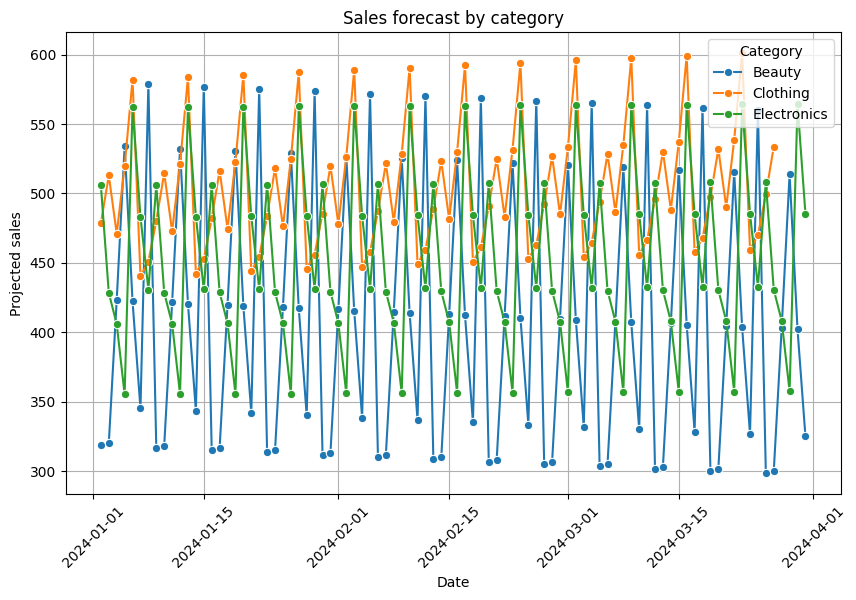

In [46]:
#Plotting predictions
plt.figure(figsize=(10,6))
sns.lineplot(data=all_forecast, x='date', y='total_amont', hue='product_category', marker='o')

plt.title('Sales forecast by category')
plt.xlabel('Date')
plt.ylabel('Projected sales')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

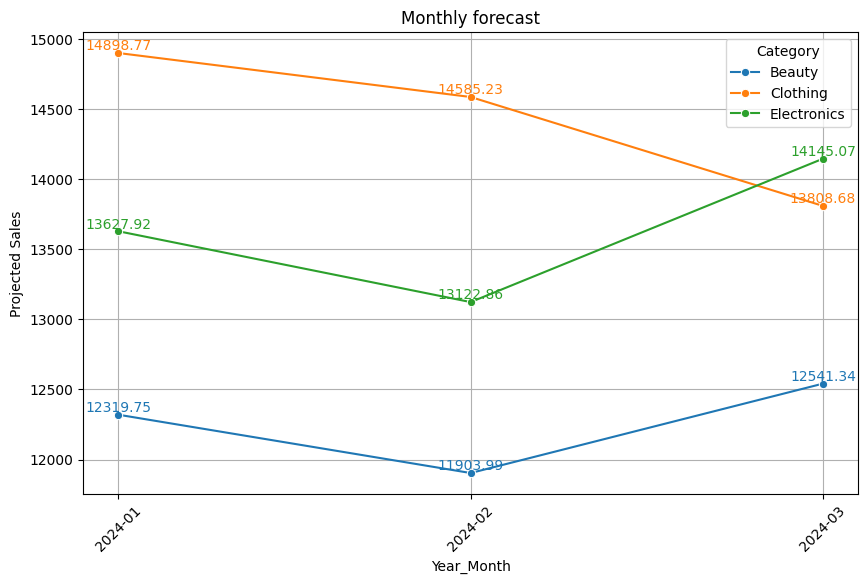

In [52]:
#Plotting monthly predictions
all_forecast['year_month'] = all_forecast['date'].dt.to_period('M')
all_forecast['year_month'] = all_forecast['year_month'].dt.strftime('%Y-%m')

#Calculate total sales by month, respect to product category
monthly_forecast = all_forecast.groupby(['year_month', 'product_category'])['total_amont'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_forecast, x='year_month', y='total_amont', hue='product_category', marker='o')

#Establishing corresponding values to the time points
for line in plt.gca().lines:
    x_data  = line.get_xdata()
    y_data = line.get_ydata()
    for i, (x,y) in enumerate(zip(x_data, y_data)):
        plt.text(x,y, f'{y:.2f}', color=line.get_color(), ha='center', va='bottom')


plt.title('Monthly forecast')
plt.xlabel('Year_Month')
plt.ylabel('Projected Sales')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()